In [1]:
import boto3
import io

S3_BUCKET_NAME = "mlve-v1"

def download_from_s3(url, resource_type="image"):
    s3 = boto3.resource('s3', region_name="us-east-2")
    bucket = s3.Bucket(S3_BUCKET_NAME)
    s3_path = url.split(".com/")[1]
    item = bucket.Object(s3_path)
    if resource_type == "image":
        file_stream = io.BytesIO()
        item.download_fileobj(file_stream)
        img = Image.open(file_stream)
        return img
    else:
        return item

1


In [52]:
import numpy as np
import matplotlib.pyplot as plt

def points_in_circle(radius, x0=0, y0=0):
    """
    returns points in a circle with a given radius, centered at x0, y0
    """
    xs = np.arange(x0 - radius - 1, x0 + radius + 1, dtype=int)
    ys = np.arange(y0 - radius - 1, y0 + radius + 1, dtype=int)
    x, y = np.where((xs[:,np.newaxis] - x0)**2 + (ys - y0)**2 <= radius**2)
    for x, y in zip(xs[x], ys[y]):
        yield x, y

def check_overlap(point, border_dist, mask, overlap_threshold=0):
    """
    Check if a point is too close to the image border or if the probe overlaps too much 
    with the wrong object
    """
    width = mask.shape[0]
    radius = 10

    mask_val = mask[point[1], point[0]]
    overlaps = 0

    for x_t, y_t in points_in_circle(radius=radius, x0=point[0], y0=point[1]):
        if x_t > (width - border_dist) or y_t > (width - border_dist) \
                or x_t < border_dist or y_t < border_dist:
            return True
        
        if mask[y_t, x_t] != mask_val:
            overlaps += 1
            print(overlaps)
            if overlaps > overlap_threshold:
                return True 

    return False


2.0


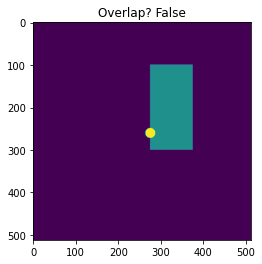

In [55]:
mask = np.zeros((512, 512))
mask[100:300, 275:375] = 1

x, y = 275, 260

radius = 12
points = np.array([(x, y) for (x, y) in points_in_circle(radius, x0=x, y0=y)])

for p in points:
    mask[p[1], p[0]] = 2

overlap = check_overlap((x, y), radius, mask)

plt.title("Overlap? " + str(overlap))
plt.imshow(mask)